# Project Samples

## HTTP scraping with Beautiful Soup

In [1]:
# Import packages HTTP
import requests
from bs4 import BeautifulSoup

# Specify url: url
#url = 'http://www.nndb.com/lists/629/000096341/' # List of physicists
url = 'http://www.nndb.com/people/302/000022236/' # Albert Einstein profile

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.content

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc, "html5lib")

# Get the title of webpage: NNDB_page_title
NNDB_page_title = soup.title

# Print the title of webpage to the shell
#print(NNDB_page_title)

# Get text: NNDB_page_text
NNDB_page_text = soup.get_text()

# Print text to the shell
#print(NNDB_page_text)

links = soup.find_all("a")

for link in links:
    #print link.text, link.get("href")
    print "<a href='%s'>%s</a>" %(link.get("href"), link.text)

<a href='http://www.nndb.com/'></a>
<a href='/lists/591/000106273/'>14-Mar</a>
<a href='/lists/878/000105563/'>1879</a>
<a href='/geo/345/000101042/'>Ulm, Wurttemberg, Germany</a>
<a href='/lists/992/000106674/'>18-Apr</a>
<a href='/lists/465/000106147/'>1955</a>
<a href='/geo/670/000069463/'>Princeton, NJ</a>
<a href='/lists/282/000069075/'>Atheist</a>
<a href='#FN1'>[1]</a>
<a href='/lists/629/000096341/'>Physicist</a>
<a href='/people/229/000058055/'>Max Planck</a>
<a href='/people/366/000168859/'>Arthur Eddington</a>
<a href='/people/115/000024043/'>Franklin D. Roosevelt</a>
<a href='/people/395/000032299/'>Paul Robeson</a>
<a href='/people/456/000024384/'>J. Edgar Hoover</a>
<a href='/people/954/000044822/'>Bertrand Russell</a>
<a href='None'>[1] Often used the word "God" or "Old Man" as a metaphor for the Laws of Nature. As a member of the American Humanist Association, there is little reason to think he believed in any kind of personal God. In a letter to Eric Gutkind dated 3 Ja

## JSON load from an API (CKAN)

In [2]:
#Import JSON packages from an API (e.g. CKAN)
import urllib2
import urllib
import json
import pprint

# Make the HTTP request.
response = urllib2.urlopen('http://demo.ckan.org/api/3/action/package_search?q=spending&rows=10')
##with open('http://demo.ckan.org/api/3/action/package_list','r') as json_file:
 #   json_data = json.load(json_file)

assert response.code == 200

# Use the json module to load CKAN's response into a dictionary.
response_dict = json.loads(response.read())
sub_dict = {}
# Check the contents of the response.
assert response_dict['success'] is True
dict_list = response_dict['result']['results']
# print dict_list
for a in range(1,len(dict_list)):
    sub_dict.update(dict_list[a])
dict_list =  zip(sub_dict.keys(),sub_dict.values())

for b in range (1, 10): # len(dict_list):
    print dict_list[b]
# print sub_dict
# print type (sub_dict)
#pprint.pprint(dict)
#print (json_data)

(u'maintainer', u'')
(u'relationships_as_object', [])
(u'private', False)
(u'maintainer_email', u'')
(u'num_tags', 0)
(u'id', u'e13109fd-b727-40a9-82d1-35a2fe3f538d')
(u'metadata_created', u'2016-04-12T08:45:33.950030')
(u'metadata_modified', u'2016-04-12T08:45:33.970906')
(u'author', u'Simona De Luca, Aline Pennisi')


## Address to Longitude, Latitude conversion

In [3]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Crawley")
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

Crawley, West Sussex, South East, England, UK
(51.1103444, -0.1801093)
{u'display_name': u'Crawley, West Sussex, South East, England, UK', u'importance': 0.59665285887146, u'place_id': u'158671038', u'lon': u'-0.1801093', u'lat': u'51.1103444', u'osm_type': u'relation', u'licence': u'Data \xa9 OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright', u'osm_id': u'114858', u'boundingbox': [u'51.0848063', u'51.167301', u'-0.2556344', u'-0.1329795'], u'type': u'administrative', u'class': u'boundary', u'icon': u'https://nominatim.openstreetmap.org/images/mapicons/poi_boundary_administrative.p.20.png'}


## Longitude, Latitude to Address conversion

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.reverse("51.505538, -0.198465")
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

9, Airlie Gardens, Notting Hill, Royal Borough of Kensington and Chelsea, London, Greater London, England, W8 7AR, UK
(51.5054197333333, -0.198617355555556)
{u'display_name': u'9, Airlie Gardens, Notting Hill, Royal Borough of Kensington and Chelsea, London, Greater London, England, W8 7AR, UK', u'place_id': u'22487687', u'lon': u'-0.198617355555556', u'boundingbox': [u'51.505319733333', u'51.505519733333', u'-0.19871735555556', u'-0.19851735555556'], u'osm_type': u'way', u'licence': u'Data \xa9 OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright', u'osm_id': u'268111758', u'lat': u'51.5054197333333', u'address': {u'city': u'London', u'state_district': u'Greater London', u'house_number': u'9', u'country': u'UK', u'suburb': u'Notting Hill', u'state': u'England', u'postcode': u'W8 7AR', u'country_code': u'gb', u'road': u'Airlie Gardens'}}


## Graphical UK shapes output

Accident dataload: 1.41799998283 seconds 
Map creation: 80.4830000401 seconds 
Accident plot: 16358.7869999 seconds 
Full run: 16440.688 seconds 


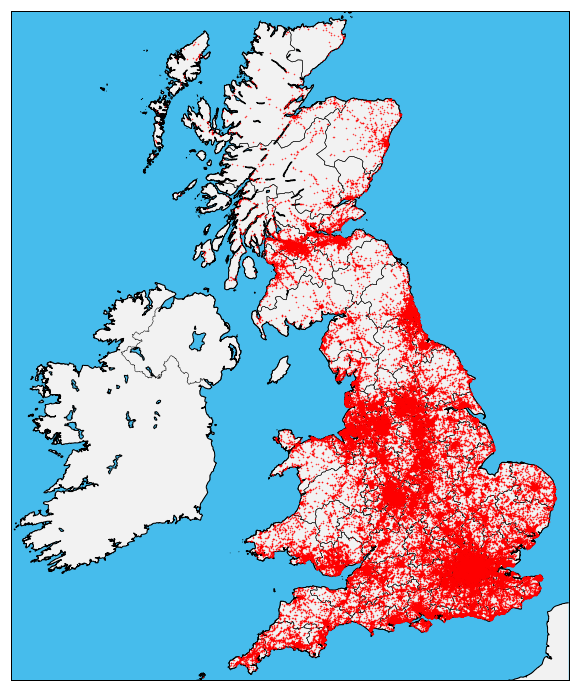

In [6]:
# import packages
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import os
import time

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

%matplotlib inline

start_time0 = time.time()
# load accident data
df = pd.read_csv("../Road_safety/Accidents_2015.csv")
df['position'] = zip(df['Latitude'], df['Longitude'])
accident = df
print "Accident dataload: %s seconds " % (time.time() - start_time0)

start_time1 = time.time()
# create map
fig, ax = plt.subplots(figsize=(10,20))
m = Basemap(resolution='f',
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-10.7, llcrnrlat=49.87, urcrnrlon=2.06, urcrnrlat=58.76)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('../Road_safety/Areas/Areas', 'areas')
print "Map creation: %s seconds " % (time.time() - start_time1)

# mark location
def plot_area(pos):
    global count
    x, y = m(pos[1], pos[0])
    m.plot(x, y, 'o', markersize=0.5, color='red', alpha=0.8)

start_time2 = time.time()    
# plot all accidents on map
accident.position.apply(plot_area)
print "Accident plot: %s seconds " % (time.time() - start_time2)
m
print "Full run: %s seconds " % (time.time() - start_time0)